In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from scipy import stats

## 1. Leitura do dataset

In [139]:
url = "heart.csv"
data = pd.read_csv(url, header=0)

cols_with_zeros = ['trestbps', 'chol', 'oldpeak', 'thalach']
data[cols_with_zeros] = data[cols_with_zeros].replace(0, np.nan)

cols_normalize=['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
data[cols_normalize]=(data[cols_normalize]-data[cols_normalize].min())/(data[cols_normalize].max()-data[cols_normalize].min())

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1,0,0.292453,0.196347,0,1,0.740458,0,0.147541,2,0.50,3,0
1,0.500000,1,0,0.433962,0.175799,1,0,0.641221,1,0.491803,0,0.00,3,0
2,0.854167,1,0,0.481132,0.109589,0,1,0.412214,1,0.409836,0,0.00,3,0
3,0.666667,1,0,0.509434,0.175799,0,1,0.687023,0,NaN,2,0.25,3,0
4,0.687500,0,0,0.415094,0.383562,1,1,0.267176,0,0.295082,1,0.75,2,0


## 2. Análise Descritiva

In [140]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,696.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,0.529878,0.695610,0.942439,0.354827,0.273973,0.149268,0.529756,0.596291,0.336585,0.242298,1.385366,0.188537,2.323902,0.513171
std,0.189006,0.460373,1.029641,0.165252,0.117791,0.356527,0.527878,0.175616,0.472772,0.182104,0.617755,0.257699,0.620660,0.500070
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.395833,0.000000,0.000000,0.245283,0.194064,0.000000,0.000000,0.465649,0.000000,0.114754,1.000000,0.000000,2.000000,0.000000
50%,0.562500,1.000000,1.000000,0.339623,0.260274,0.000000,1.000000,0.618321,0.000000,0.213115,1.000000,0.000000,2.000000,1.000000
75%,0.666667,1.000000,2.000000,0.433962,0.340183,0.000000,1.000000,0.725191,1.000000,0.344262,2.000000,0.250000,3.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000


# 3. Visualização dos Dados

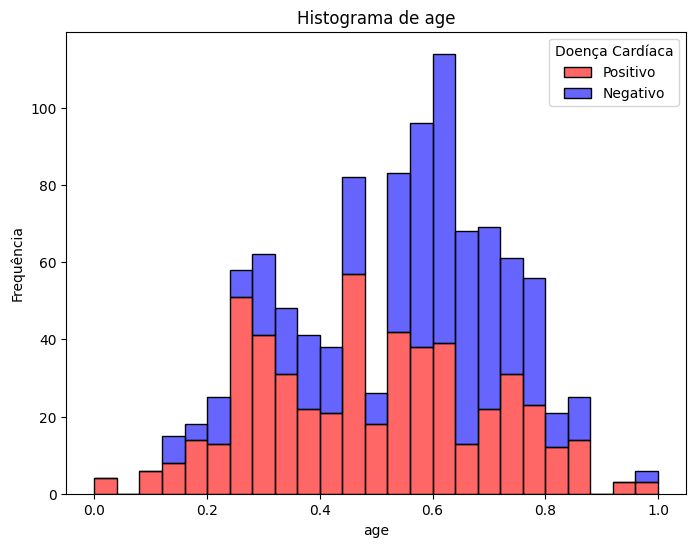

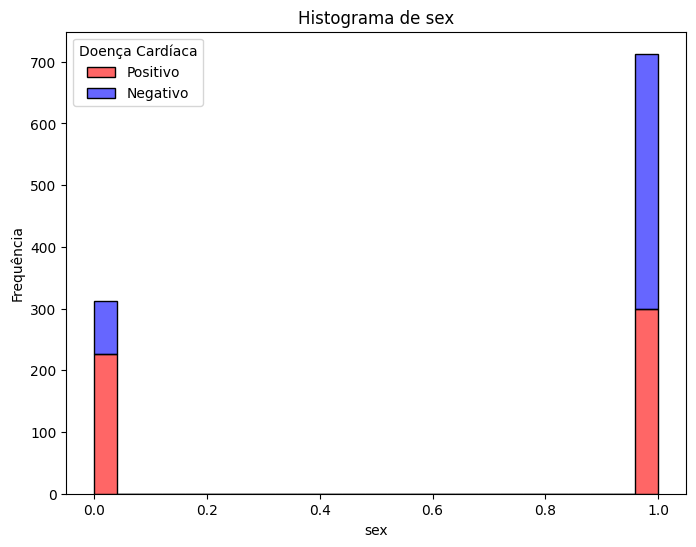

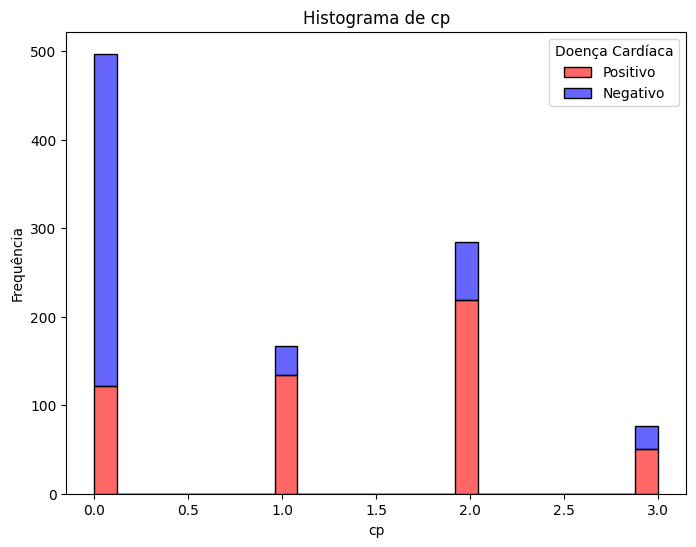

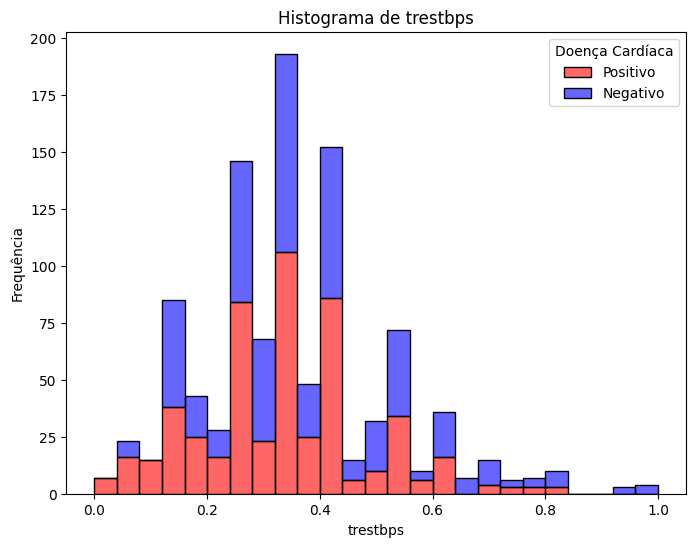

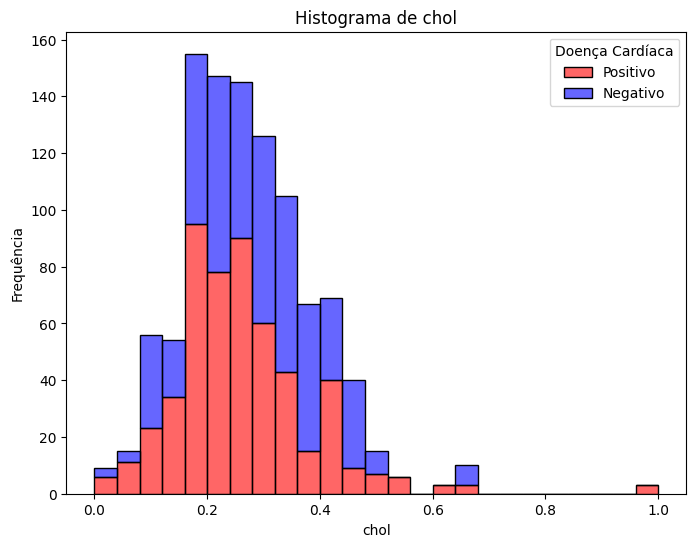

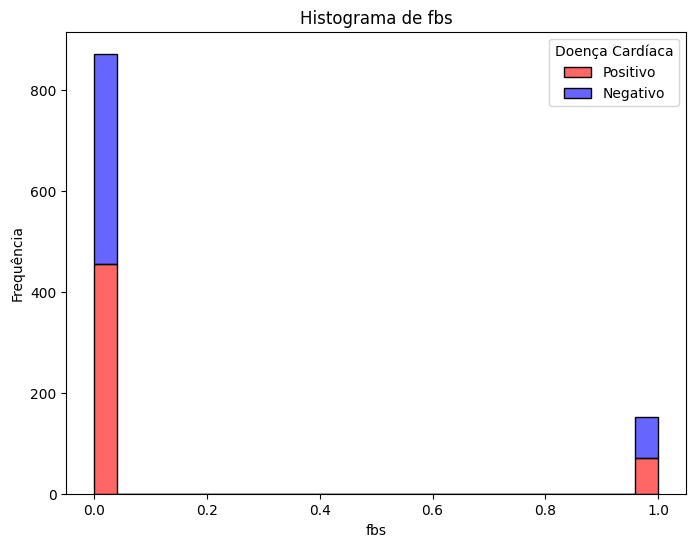

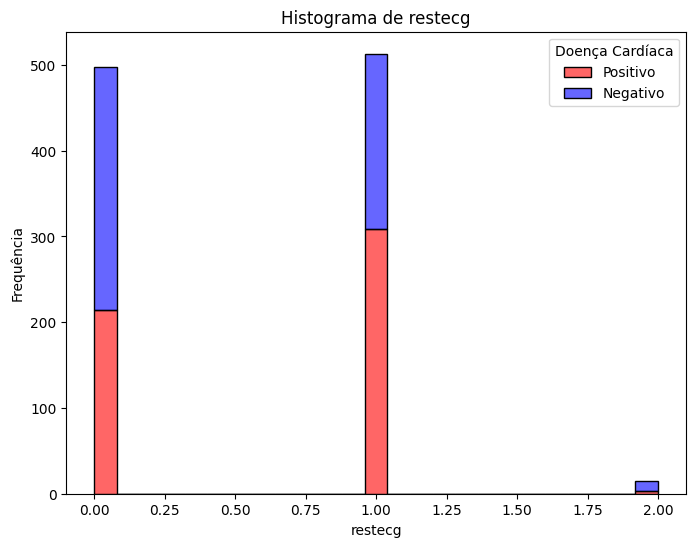

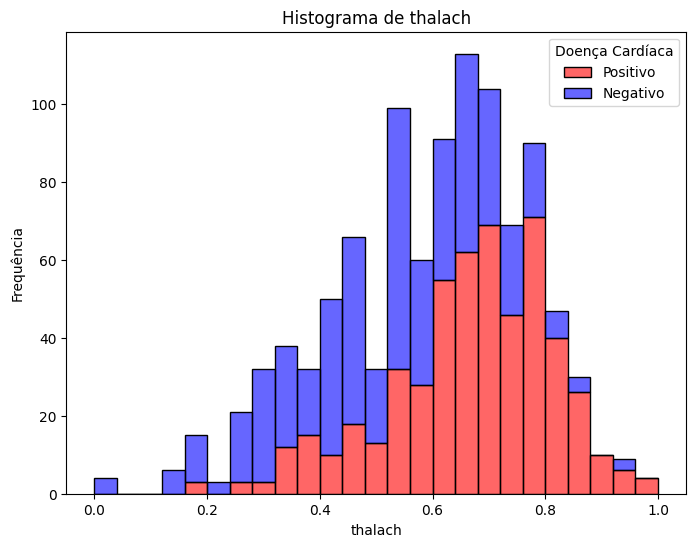

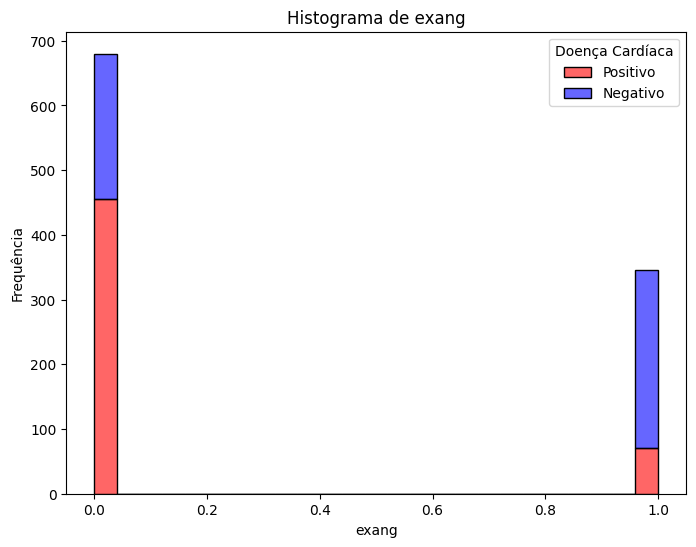

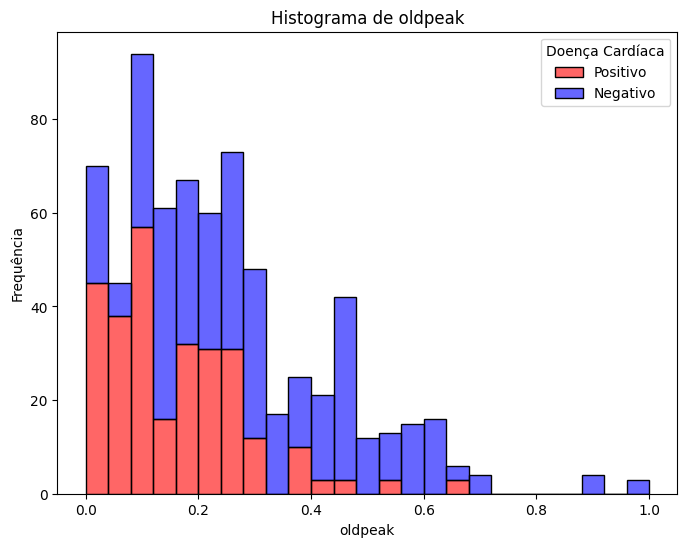

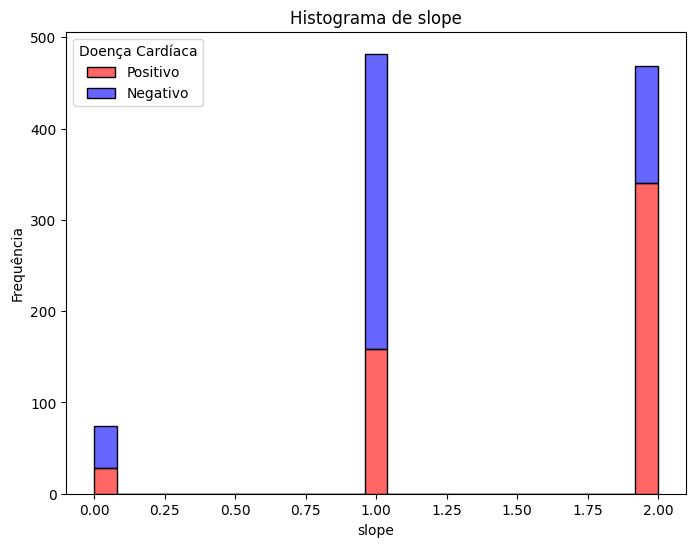

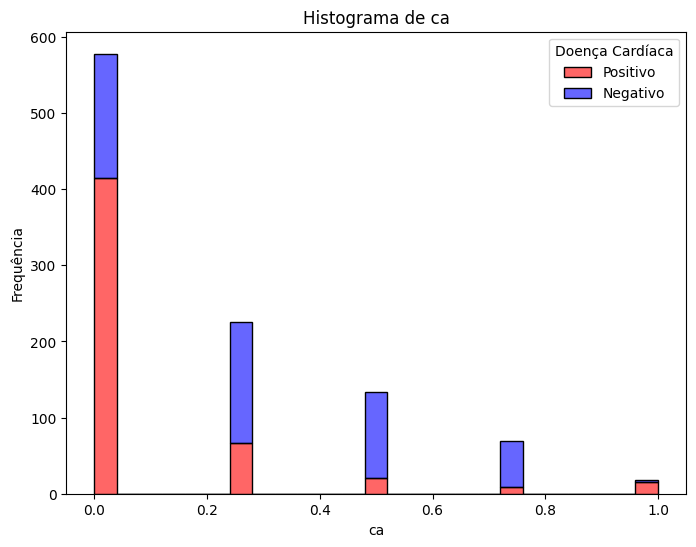

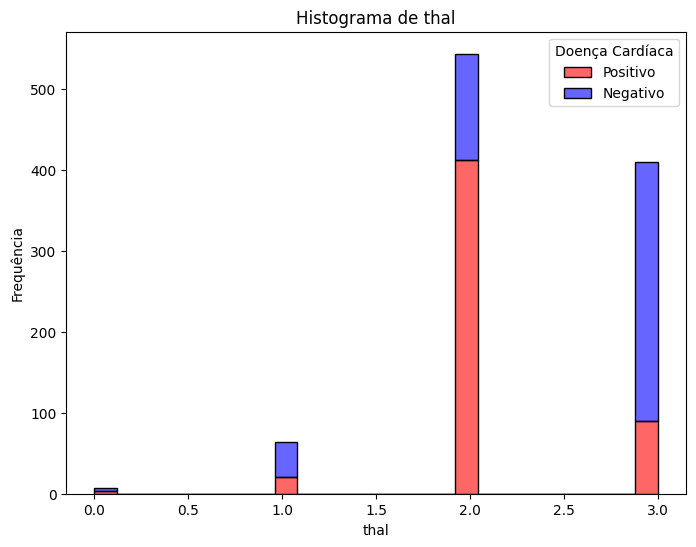

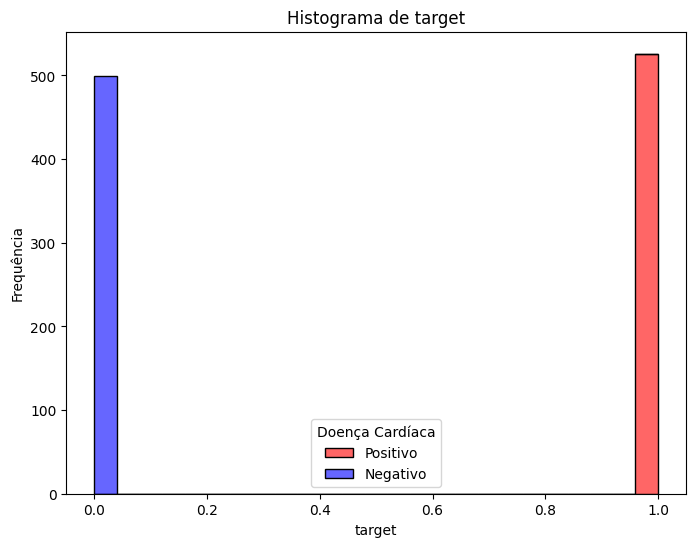

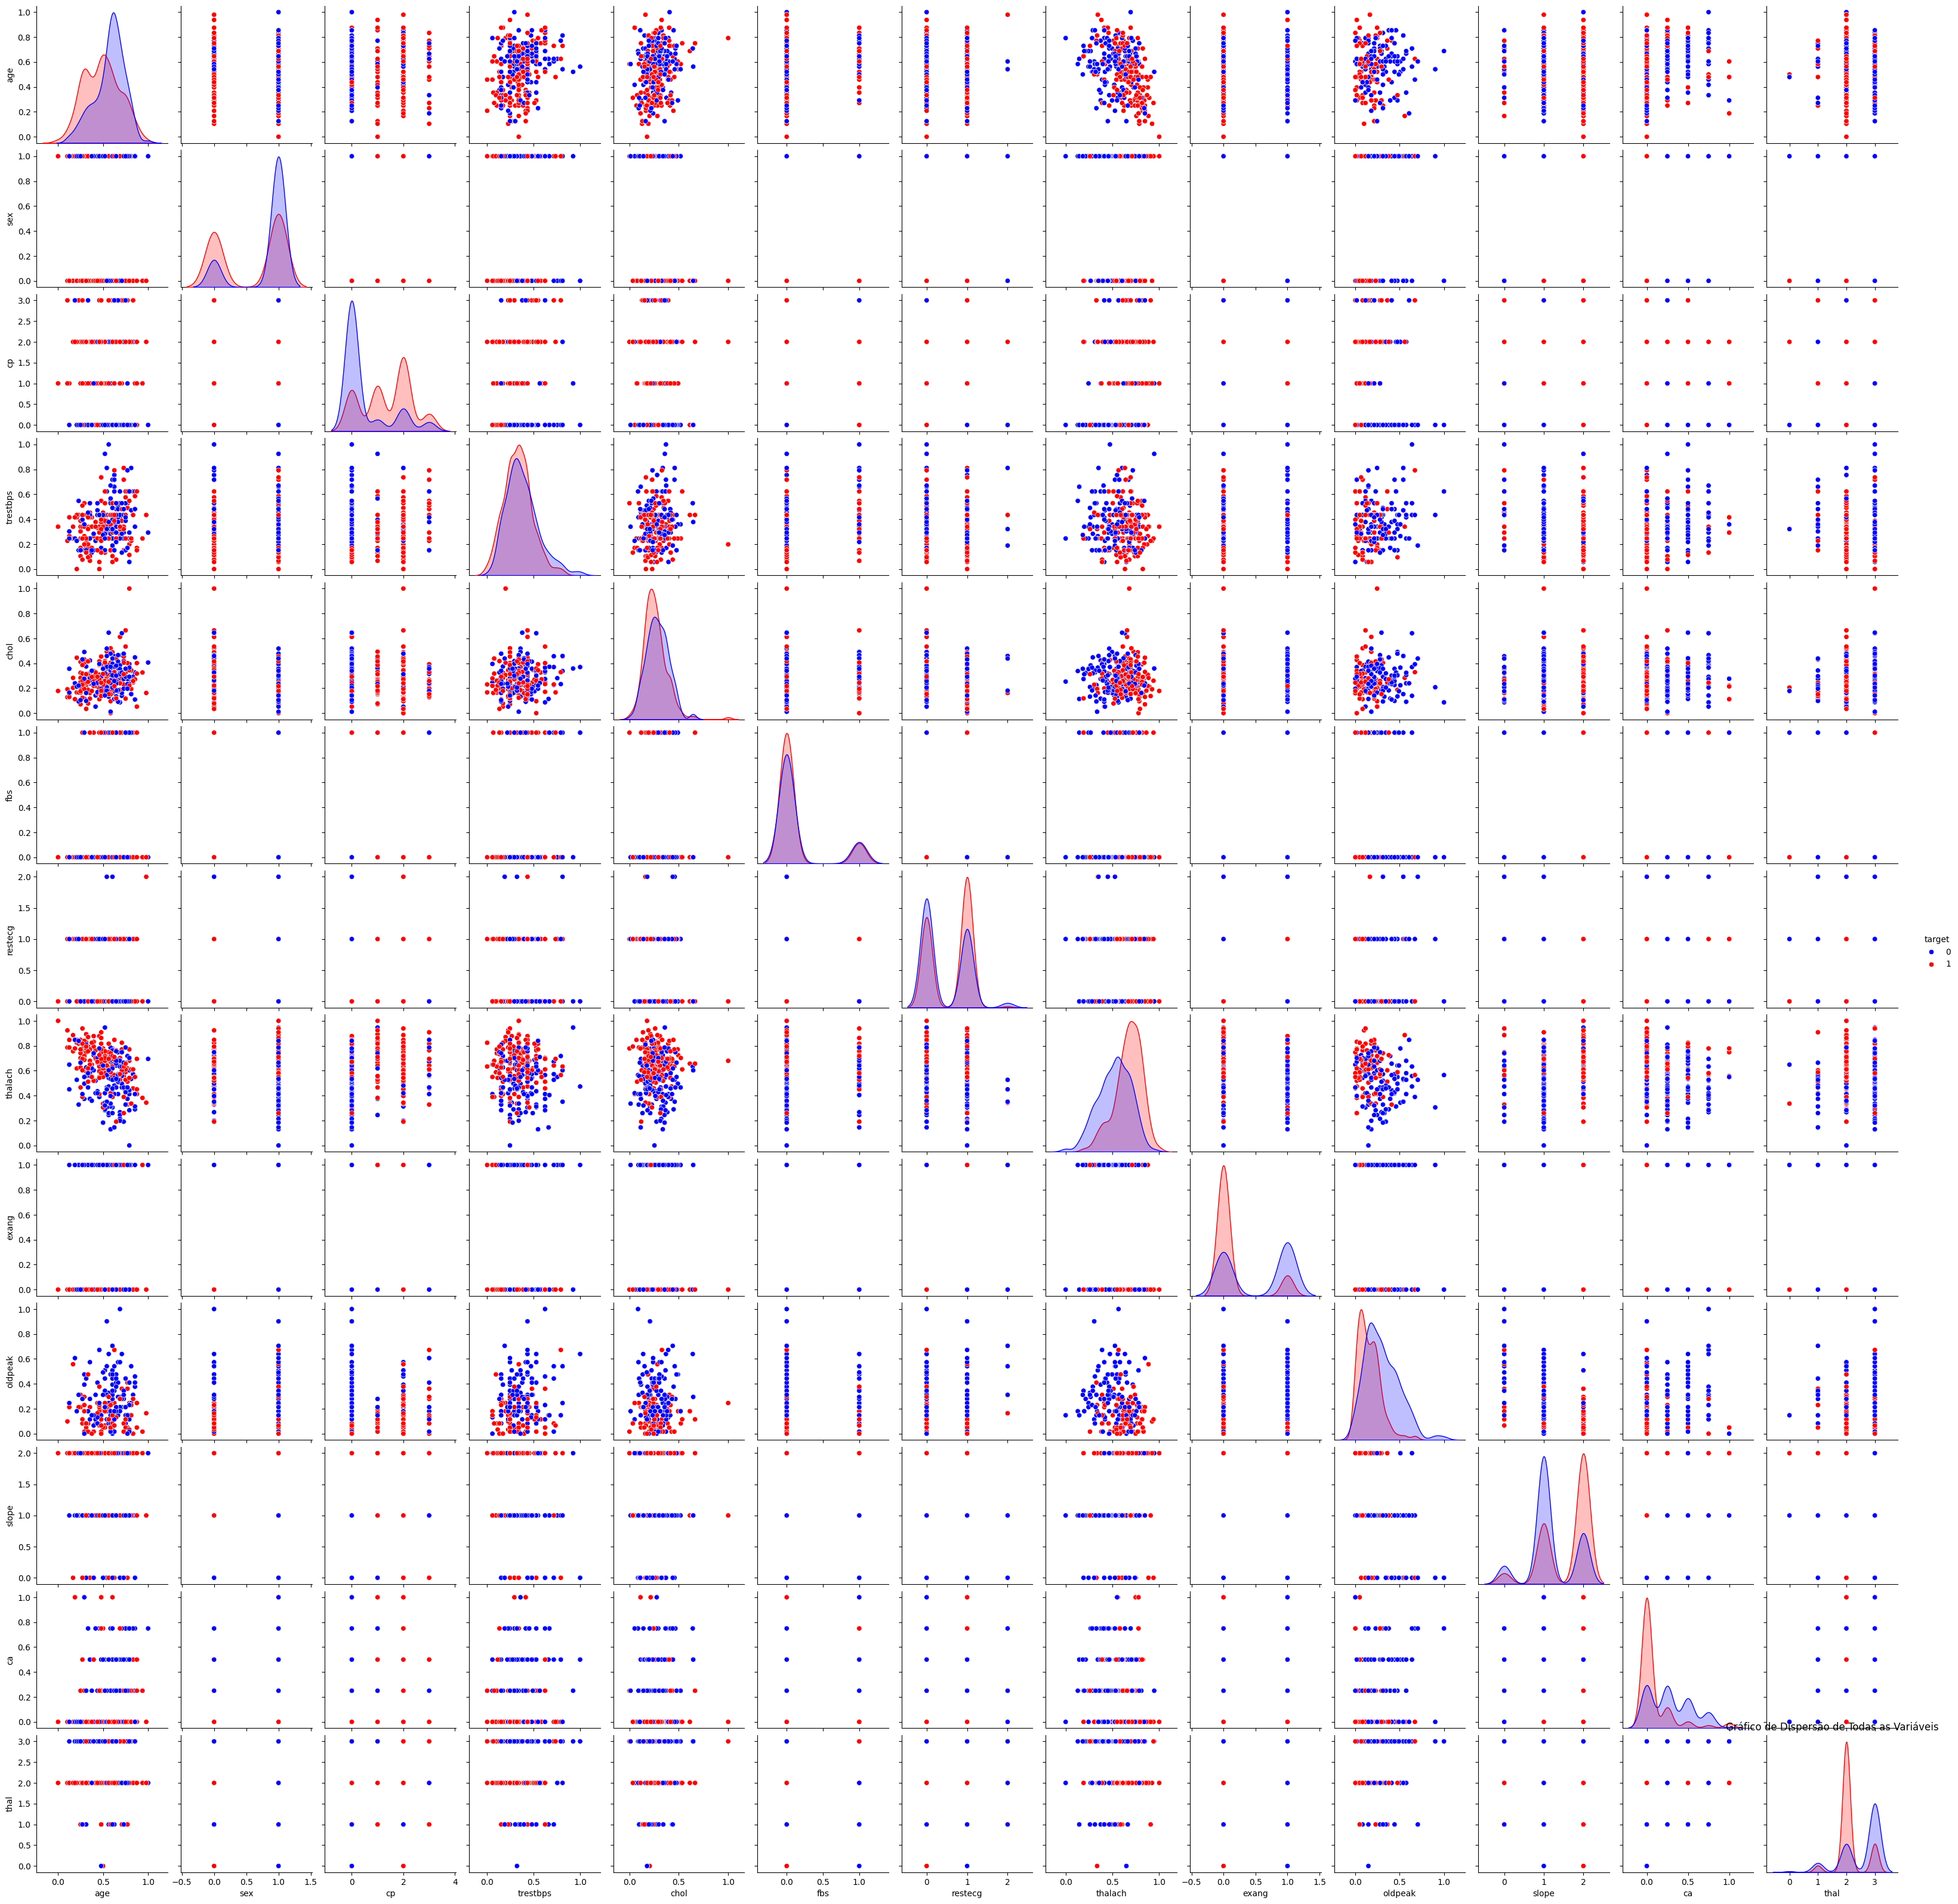

In [141]:
for column in data.columns:
    if pd.api.types.is_numeric_dtype(data[column]):
        plt.figure(figsize=(8, 6))
        
        sns.histplot(data=data, x=column, hue='target', multiple='stack', bins=25, palette={0: 'blue', 1: 'red'}, alpha=0.6, edgecolor='black')
        
        plt.title(f'Histograma de {column}')
        plt.xlabel(column)
        plt.ylabel('Frequência')
        plt.legend(title='Doença Cardíaca', labels=['Positivo', 'Negativo'])
        
        plt.show()
        
sns.pairplot(data, hue='target', palette={0: 'blue', 1: 'red'})
plt.title('Gráfico de Dispersão de Todas as Variáveis')
plt.show() 

# 4. Teste de Correlação

Coeficiente de Correlação (age x chol): 0.1563, p-valor: 0.0000
Coeficiente de Correlação (age x thalach): -0.3127, p-valor: 0.0000


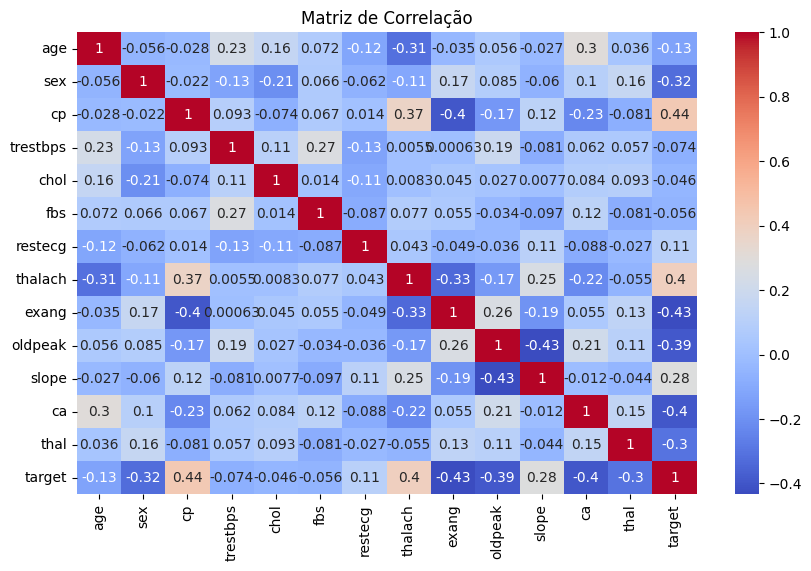

In [142]:
data = data.dropna()

correlation, p_value = stats.pearsonr(data['chol'], data['age'])
print(f'Coeficiente de Correlação (age x chol): {correlation:.4f}, p-valor: {p_value:.4f}')

correlation, p_value = stats.pearsonr(data['thalach'], data['age'])
print(f'Coeficiente de Correlação (age x thalach): {correlation:.4f}, p-valor: {p_value:.4f}')

plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

# 5. Regressão Logística

In [143]:
X = data.drop(columns=['target'])
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print('\nCoeficientes:')
coef = pd.DataFrame(model.coef_, columns=X.columns)
coef['Intercept'] = model.intercept_
print(coef)

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       131
           1       0.79      0.82      0.81        78

    accuracy                           0.85       209
   macro avg       0.84      0.85      0.84       209
weighted avg       0.85      0.85      0.85       209

[[114  17]
 [ 14  64]]

Coeficientes:
        age      sex        cp  trestbps      chol       fbs   restecg  \
0 -0.041685 -0.94535  0.862617 -0.121625 -0.247667 -0.161729  0.045855   

   thalach     exang   oldpeak     slope        ca      thal  Intercept  
0  0.59634 -0.835417 -0.562198  0.399232 -0.976836 -0.639689    -0.9151  


# 6.Interpretação dos Resultados

In [144]:
# Calcular AIC
p = model.predict_proba(X_test)[:, 1]  
log_likelihood = np.sum(y_test * np.log(p) + (1 - y_test) * np.log(1 - p))
k = X_test.shape[1]
aic = 2 * k - 2 * log_likelihood

print(f"AIC: {aic}")

AIC: 176.03768251407377


O AIC é usado para avaliar e comparar modelos estatísticos. Ele mede a qualidade do ajuste e penaliza modelos mais complexos.

# 7.Conclusão

As variáveis com maior impacto são: ca, sex, exang, cp e thalac.